In [1]:
import networkx as nx
G= nx.read_gml("Albienes.gml")
print(G.nodes(data=True))

[('ATLAM5', {'country': 'US', 'Longitude': -84.3833, 'Latitude': 33.75}), ('ATLAng', {'country': 'US', 'Longitude': -85.5, 'Latitude': 34.5}), ('CHINng', {'country': 'US', 'Longitude': -87.6167, 'Latitude': 41.8333}), ('DNVRng', {'country': 'US', 'Longitude': -105.0, 'Latitude': 40.75}), ('HSTNng', {'country': 'US', 'Longitude': -95.517364, 'Latitude': 29.770031}), ('IPLSng', {'country': 'US', 'Longitude': -86.159535, 'Latitude': 39.780622}), ('KSCYng', {'country': 'US', 'Longitude': -96.596704, 'Latitude': 38.961694}), ('LOSAng', {'country': 'US', 'Longitude': -118.25, 'Latitude': 34.05}), ('NYCMng', {'country': 'US', 'Longitude': -73.9667, 'Latitude': 40.7833}), ('SNVAng', {'country': 'US', 'Longitude': -122.02553, 'Latitude': 37.38575}), ('STTLng', {'country': 'US', 'Longitude': -122.3, 'Latitude': 47.6}), ('WASHng', {'country': 'US', 'Longitude': -77.026842, 'Latitude': 38.897303})]


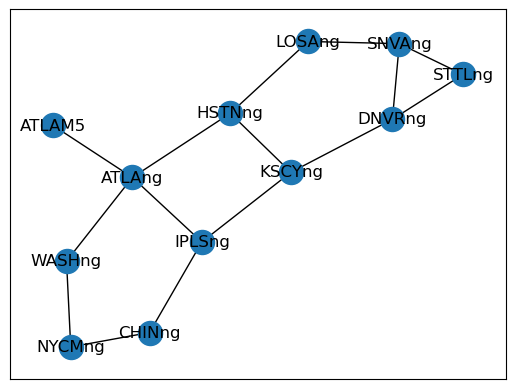

In [2]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G,seed=3113794652)
nx.draw_networkx(G,pos,with_labels=True)

In [3]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

# Define the latency matrix, bandwidth, cost, and demand
latency_matrix = np.array([[0, 0.66, 4.91, 11.84, 6.06, 3.61, 8.12, 17.02, 6.83, 19.41, 19.69, 5.16],
                           [0.66, 0, 4.25, 11.18, 5.4, 2.95, 7.46, 16.36, 6.17, 18.75, 19.03, 4.5],
                           [4.91, 4.25, 0, 9.53, 9.65, 1.3, 5.81, 19.62, 5.72, 17.1, 17.38, 7.39],
                           [11.84, 11.18, 9.53, 0, 8.85, 8.23, 3.72, 10.09, 15.25, 7.57, 7.85, 15.68],
                           [6.06, 5.4, 9.65, 8.85, 0, 8.35, 5.13, 10.96, 11.57, 13.48, 16.7, 9.9],
                           [3.61, 2.95, 1.3, 8.23, 8.35, 0, 4.51, 18.32, 7.02, 15.8, 16.08, 7.45],
                           [8.12, 7.46, 5.81, 3.72, 5.13, 4.51, 0, 13.81, 11.53, 11.29, 11.57, 11.96],
                           [17.02, 16.36, 19.62, 10.09, 10.96, 18.32, 13.81, 0, 22.53, 2.52, 8.2, 20.86],
                           [6.83, 6.17, 5.72, 15.25, 11.57, 7.02, 11.53, 22.53, 0, 22.82, 23.1, 1.67],
                           [19.41, 18.75, 17.1, 7.57, 13.48, 15.8, 11.29, 2.52, 22.82, 0, 5.68, 23.25],
                           [19.69, 19.03, 17.38, 7.85, 16.7, 16.08, 11.57, 8.2, 23.1, 5.68, 0, 23.53],
                           [5.16, 4.5, 7.39, 15.68, 9.9, 7.45, 11.96, 20.86, 1.67, 23.25, 23.53, 0]])

num_nodes = 12
bandwidth = np.array([random.uniform(5, 10) for _ in range(num_nodes)])
cost = [133, 1081, 591, 901, 260, 1147, 745, 1516, 1573, 1028, 2196, 903]
demand = [1140, 56067, 9094, 37150, 14471, 1147, 4165, 22050, 6470, 2026, 16437, 4841]

def fitness_function(controllers, latency_matrix, cost, bandwidth, demand):
    delay = np.mean([latency_matrix[controller] for controller in controllers])
    total_cost = sum(cost[controller] for controller in controllers)
    total_bandwidth = sum(bandwidth[controller] for controller in controllers)
    total_demand = sum(demand[controller] for controller in controllers)
    fitness = 1 / delay + total_bandwidth + 1 / total_cost + total_demand
    return fitness

def initialize_population(pop_size, num_nodes, num_controllers):
    population = []
    for _ in range(pop_size):
        individual = random.sample(range(num_nodes), num_controllers)
        population.append(individual)
    return population

def select_best(population, latency_matrix, bandwidth, cost, demand):
    best_individual = None
    best_fitness = float('-inf')
    for individual in population:
        fitness = fitness_function(individual, latency_matrix, cost, bandwidth, demand)
        if fitness > best_fitness:
            best_fitness = fitness
            best_individual = individual
    return best_individual

def krill_herd_optimization(latency_matrix, bandwidth, cost, demand, num_controllers, pop_size=10, iterations=100):
    num_nodes = len(latency_matrix)
    population = initialize_population(pop_size, num_nodes, num_controllers)
    
    for _ in range(iterations):
        best_individual = select_best(population, latency_matrix, bandwidth, cost, demand)
        
        for i in range(pop_size):
            if random.random() < 0.1:  
                new_individual = random.sample(range(num_nodes), num_controllers)
                
                if fitness_function(new_individual, latency_matrix, cost, bandwidth, demand) > fitness_function(population[i], latency_matrix, cost, bandwidth, demand):
                    population[i] = new_individual
    
    return select_best(population, latency_matrix, bandwidth, cost, demand)

def evaluate_fitness_for_controllers(latency_matrix, bandwidth, cost, demand, max_controllers):
    fitness_scores = []
    for num_controllers in range(1, max_controllers + 1):
        best_controllers = krill_herd_optimization(latency_matrix, bandwidth, cost, demand, num_controllers)
        fitness = fitness_function(best_controllers, latency_matrix, cost, bandwidth, demand)
        fitness_scores.append((num_controllers, fitness))
    return fitness_scores

def elbow_method(fitness_scores):
    x = [score[0] for score in fitness_scores]
    y = [score[1] for score in fitness_scores]

    

    # Calculate the second derivative
    first_derivative = np.diff(y)
    second_derivative = np.diff(first_derivative)

    elbow_point = np.argmin(second_derivative) + 2  # +2 to account for the double diff and 1-based index
    return elbow_point

# Evaluate fitness for different numbers of controllers
max_controllers = num_nodes  # as a reasonable upper limit
fitness_scores = evaluate_fitness_for_controllers(latency_matrix, bandwidth, cost, demand, max_controllers)

# Determine the optimal number of controllers using the elbow method
optimal_num_controllers = elbow_method(fitness_scores)
print(f"Optimal number of controllers (Elbow Method): {optimal_num_controllers}")

# Use Krill Herd Optimization to find the best controllers with the optimal number of controllers
best_controllers = krill_herd_optimization(latency_matrix, bandwidth, cost, demand, optimal_num_controllers)
print(f"Best controllers: {best_controllers}")


Optimal number of controllers (Elbow Method): 2
Best controllers: [1, 3]


In [32]:
import numpy as np
import random

# Define the latency matrix, bandwidth, cost, and demand
latency_matrix = np.array([[0, 0.66, 4.91, 11.84, 6.06, 3.61, 8.12, 17.02, 6.83, 19.41, 19.69, 5.16],
                           [0.66, 0, 4.25, 11.18, 5.4, 2.95, 7.46, 16.36, 6.17, 18.75, 19.03, 4.5],
                           [4.91, 4.25, 0, 9.53, 9.65, 1.3, 5.81, 19.62, 5.72, 17.1, 17.38, 7.39],
                           [11.84, 11.18, 9.53, 0, 8.85, 8.23, 3.72, 10.09, 15.25, 7.57, 7.85, 15.68],
                           [6.06, 5.4, 9.65, 8.85, 0, 8.35, 5.13, 10.96, 11.57, 13.48, 16.7, 9.9],
                           [3.61, 2.95, 1.3, 8.23, 8.35, 0, 4.51, 18.32, 7.02, 15.8, 16.08, 7.45],
                           [8.12, 7.46, 5.81, 3.72, 5.13, 4.51, 0, 13.81, 11.53, 11.29, 11.57, 11.96],
                           [17.02, 16.36, 19.62, 10.09, 10.96, 18.32, 13.81, 0, 22.53, 2.52, 8.2, 20.86],
                           [6.83, 6.17, 5.72, 15.25, 11.57, 7.02, 11.53, 22.53, 0, 22.82, 23.1, 1.67],
                           [19.41, 18.75, 17.1, 7.57, 13.48, 15.8, 11.29, 2.52, 22.82, 0, 5.68, 23.25],
                           [19.69, 19.03, 17.38, 7.85, 16.7, 16.08, 11.57, 8.2, 23.1, 5.68, 0, 23.53],
                           [5.16, 4.5, 7.39, 15.68, 9.9, 7.45, 11.96, 20.86, 1.67, 23.25, 23.53, 0]])

num_nodes = 12
bandwidth = np.array([random.uniform(5, 10) for _ in range(num_nodes)])
cost = [133, 1081, 591, 901, 260, 1147, 745, 1516, 1573, 1028, 2196, 903]
demand = [1140, 56067, 9094, 37150, 14471, 1147, 4165, 22050, 6470, 2026, 16437, 4841]

def fitness_function(controllers, latency_matrix, cost, bandwidth, demand):
    delay = np.mean([latency_matrix[controller] for controller in controllers])
    total_cost = sum(cost[controller] for controller in controllers)
    total_bandwidth = sum(bandwidth[controller] for controller in controllers)
    total_demand = sum(demand[controller] for controller in controllers)
    fitness = 1 / delay + total_bandwidth + 1 / total_cost + total_demand
    return fitness

def initialize_population(pop_size, num_nodes, num_controllers):
    population = []
    for _ in range(pop_size):
        individual = random.sample(range(num_nodes), num_controllers)
        population.append(individual)
    return population

def select_best(population, latency_matrix, bandwidth, cost, demand):
    best_individual = None
    best_fitness = float('-inf')
    for individual in population:
        fitness = fitness_function(individual, latency_matrix, cost, bandwidth, demand)
        if fitness > best_fitness:
            best_fitness = fitness
            best_individual = individual
    return best_individual

def krill_herd_optimization(latency_matrix, bandwidth, cost, demand, num_controllers, pop_size=10, iterations=100):
    num_nodes = len(latency_matrix)
    population = initialize_population(pop_size, num_nodes, num_controllers)
    
    for _ in range(iterations):
        best_individual = select_best(population, latency_matrix, bandwidth, cost, demand)
        
        for i in range(pop_size):
            if random.random() < 0.1:  
                new_individual = random.sample(range(num_nodes), num_controllers)
                
                if fitness_function(new_individual, latency_matrix, cost, bandwidth, demand) > fitness_function(population[i], latency_matrix, cost, bandwidth, demand):
                    population[i] = new_individual
    
    return select_best(population, latency_matrix, bandwidth, cost, demand)

def evaluate_fitness_for_controllers(latency_matrix, bandwidth, cost, demand, max_controllers):
    fitness_scores = []
    for num_controllers in range(1, max_controllers + 1):
        best_controllers = krill_herd_optimization(latency_matrix, bandwidth, cost, demand, num_controllers)
        fitness = fitness_function(best_controllers, latency_matrix, cost, bandwidth, demand)
        fitness_scores.append((num_controllers, fitness))
    return fitness_scores

def elbow_method(fitness_scores):
    x = [score[0] for score in fitness_scores]
    y = [score[1] for score in fitness_scores]

    first_derivative = np.diff(y)
    second_derivative = np.diff(first_derivative)

    elbow_point = np.argmin(second_derivative) + 2  # +2 to account for the double diff and 1-based index
    return elbow_point

def cluster_switches(latency_matrix, best_controllers, demand):
    num_switches = len(latency_matrix)
    clusters = {controller: [] for controller in best_controllers}
    unassigned_switches = set(range(num_switches)) - set(best_controllers)
    
    for controller in best_controllers:
        to_remove = []
        for switch in unassigned_switches:
            min_latency = float('inf')
            assigned_controller = None
            for ctrl in best_controllers:
                if ctrl in clusters:
                    latency = latency_matrix[switch, ctrl] * demand[switch]
                    if latency < min_latency:
                        min_latency = latency
                        assigned_controller = ctrl
            if assigned_controller == controller:
                clusters[controller].append(switch)
                to_remove.append(switch)
        unassigned_switches -= set(to_remove)
    
    return clusters

max_controllers = num_nodes  # as a reasonable upper limit
fitness_scores = evaluate_fitness_for_controllers(latency_matrix, bandwidth, cost, demand, max_controllers)

optimal_num_controllers = elbow_method(fitness_scores)
print(f"Optimal number of controllers (Elbow Method): {optimal_num_controllers}")


best_controllers = krill_herd_optimization(latency_matrix, bandwidth, cost, demand, optimal_num_controllers)
print(f"Best controllers: {best_controllers}")

clusters = cluster_switches(latency_matrix, best_controllers, demand)


print("Clusters:")
for controller, switches in clusters.items():
    print(f"Controller {controller}: {switches}")


Optimal number of controllers (Elbow Method): 2
Best controllers: [3, 1]
Clusters:
Controller 3: [6, 7, 9, 10]
Controller 1: [0, 2, 4, 5, 8, 11]


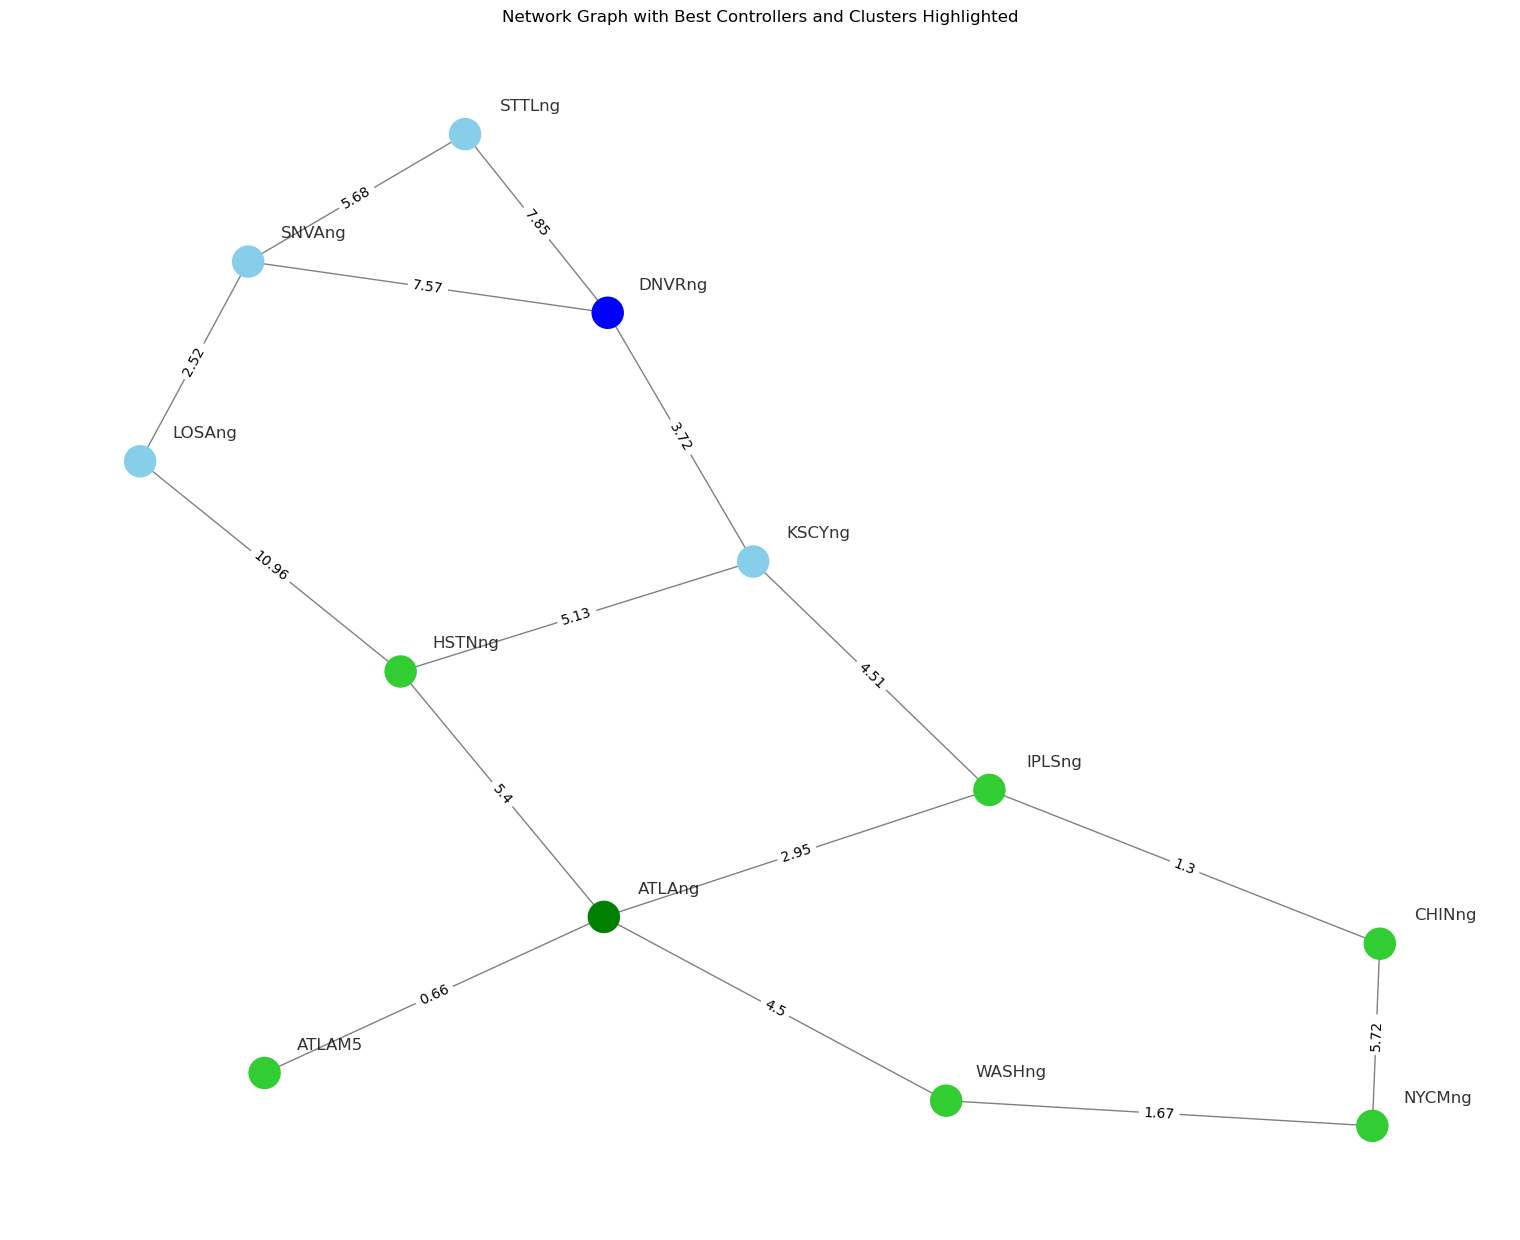

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network(G, best_controllers, clusters, latency_matrix, y_off=0.05, x_off=0.05):
    pos = nx.spring_layout(G)
    node_colors = ['black' for _ in G.nodes()]
    
    controller_colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']
    floral_colors = ['skyblue', 'limegreen', 'salmon', 'coral', 'lavender', 'turquoise', 'fuchsia', 'lemonchiffon', 'peachpuff', 'palevioletred']
    
    for idx, controller in enumerate(best_controllers):
        node_colors[controller] = controller_colors[idx % len(controller_colors)]

    for idx, (controller, switches) in enumerate(clusters.items()):
        floral_color = floral_colors[idx % len(floral_colors)]
        for switch in switches:
            node_colors[switch] = floral_color
    
    pos_higher = {k: (v[0] + x_off, v[1] + y_off) for k, v in pos.items()}

    plt.figure(figsize=(15, 12))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='gray')

    latency_list = latency_matrix.tolist()
    node_to_index = {node: i for i, node in enumerate(G.nodes())}

    edge_labels = {}
    for u, v in G.edges():
        edge_labels[(u, v)] = latency_list[node_to_index[u]][node_to_index[v]]

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    nx.draw_networkx_labels(G, pos_higher, font_size=12, alpha=0.8)

    plt.title("Network Graph with Best Controllers and Clusters Highlighted")
    plt.show()

# Example usage
G = nx.read_gml("Albiene.gml")

clusters = cluster_switches(latency_matrix, best_controllers, demand)
plot_network(G, best_controllers, clusters, latency_matrix)


In [42]:
avg_latencies = {}
total_latency_all_clusters = 0
total_switches_all_clusters = 0

# Assuming clusters contain controller indices directly
for i, (controller_idx, switches) in enumerate(clusters.items()):
    # Convert controller index to integer (if necessary)
    controller_index = int(controller_idx)  # Controller index in latency_matrix
    total_latency = 0
    
    # Calculate total latency for switches in this cluster
    for switch in switches:
        total_latency += latency_matrix[switch, controller_index]
    
    # Calculate average latency for this cluster
    avg_latency = total_latency / len(switches)
    avg_latencies[controller_idx] = avg_latency
    
    # Accumulate totals for overall average latency calculation
    total_latency_all_clusters += total_latency
    total_switches_all_clusters += len(switches)

# Print average latency for each cluster
for i, (controller_idx, avg_latency) in enumerate(avg_latencies.items()):
    print(f"Average latency for cluster {controller_idx}: {avg_latency:.2f}")

# Calculate overall average latency across all clusters
overall_avg_latency = total_latency_all_clusters / total_switches_all_clusters
print(f"Overall average latency for all clusters: {overall_avg_latency:.2f}")


Average latency for cluster 3: 7.31
Average latency for cluster 1: 3.99
Overall average latency for all clusters: 5.32


In [44]:
worst_case_latencies = {}

# Assuming clusters contain controller indices directly
for controller_idx, switches in clusters.items():
    # Convert controller index to integer (if necessary)
    controller_index = int(controller_idx)  # Controller index in latency_matrix
    worst_latency = 0
    
    # Find the worst-case latency for switches in this cluster
    for switch in switches:
        latency = latency_matrix[switch, controller_index]
        if latency > worst_latency:
            worst_latency = latency
    
    # Store worst-case latency for this cluster
    worst_case_latencies[controller_idx] = worst_latency

# Print worst-case latency for each cluster
for i, (controller_idx, worst_latency) in enumerate(worst_case_latencies.items()):
    print(f"Worst-case latency for cluster {controller_idx}: {worst_latency:.2f}")

# Calculate average worst-case latency across all clusters
average_worst_latency = sum(worst_case_latencies.values()) / len(worst_case_latencies)
print(f"Average worst-case latency across all clusters: {average_worst_latency:.2f}")


Worst-case latency for cluster 3: 10.09
Worst-case latency for cluster 1: 6.17
Average worst-case latency across all clusters: 8.13


In [45]:
avg_costs = {}
total_cost_all_clusters = 0
total_switches_all_clusters = 0

for controller, switches in clusters.items():
    total_cost = sum([cost[i] for i in switches])
    avg_cost = total_cost / len(switches)
    avg_costs[controller] = avg_cost
    total_cost_all_clusters += total_cost
    total_switches_all_clusters += len(switches)

for i, (controller, avg_cost) in enumerate(avg_costs.items()):
    print(f"Average cost for cluster {i+1}: {avg_cost:.2f}")

overall_avg_cost = total_cost_all_clusters / total_switches_all_clusters
print(f"Overall average cost for all clusters: {overall_avg_cost:.2f}")


Average cost for cluster 1: 1371.25
Average cost for cluster 2: 767.83
Overall average cost for all clusters: 1009.20


In [46]:
import numpy as np

def calculate_throughput(latency_matrix, switches, controllers, bandwidth):
    num_nodes = len(latency_matrix)
    throughput = np.zeros((len(switches), len(controllers)))

    for i, switch in enumerate(switches):
        for j, controller in enumerate(controllers):
            latency = latency_matrix[switch, controller]
            
            # Check if latency is not zero
            if latency != 0:
                throughput[i, j] = bandwidth[switch] / latency
            else:
                # If latency is zero, set throughput to a default value (e.g. bandwidth)
                throughput[i, j] = bandwidth[switch]
    
    return throughput

throughput = calculate_throughput(latency_matrix, switches, best_controllers, bandwidth)

for i, switch in enumerate(switches):
    for j, controller in enumerate(best_controllers):
        print(f"Throughput for Switch {switch} to Controller {controller}: {throughput[i, j]}")

Throughput for Switch 0 to Controller 3: 0.49826619634234665
Throughput for Switch 0 to Controller 1: 8.938593582868764
Throughput for Switch 2 to Controller 3: 0.6667073643231511
Throughput for Switch 2 to Controller 1: 1.4949932192940305
Throughput for Switch 4 to Controller 3: 0.7304560507780761
Throughput for Switch 4 to Controller 1: 1.197136305441847
Throughput for Switch 5 to Controller 3: 0.9254381640011936
Throughput for Switch 5 to Controller 1: 2.5818156236372283
Throughput for Switch 8 to Controller 3: 0.3749870090293158
Throughput for Switch 8 to Controller 1: 0.9268317484111939
Throughput for Switch 11 to Controller 3: 0.360208919673661
Throughput for Switch 11 to Controller 1: 1.2551279689962231


In [47]:
average_throughput = np.mean(throughput, axis=0)
total_throughput = 0
num_clusters = len(best_controllers)

for j, controller in enumerate(best_controllers):
    total_throughput += average_throughput[j]
    print(f"Average throughput for Cluster {j+1}: {average_throughput[j]}")

overall_avg_throughput = total_throughput / num_clusters
print(f"Overall average throughput for all clusters: {overall_avg_throughput:.2f}")


Average throughput for Cluster 1: 0.592677284024624
Average throughput for Cluster 2: 2.7324164081082145
Overall average throughput for all clusters: 1.66


In [54]:
clusters = {
    'Controller 3': [6, 7, 9, 10],
    'Controller 1': [0, 2, 4, 5, 8, 11]
}
cluster_indices = {}
for controller, switches in clusters.items():
    index = int(controller.split()[-1]) - 1  # Extract index from controller name
    cluster_indices[controller] = index

# Example usage to print indices
for controller, index in cluster_indices.items():
    print(f"{controller}: {index}")

# Proceed with calculating average latency between clusters using cluster_indices and latency_matrix
avg_latency_between_clusters = {}
for controller1, switches1 in clusters.items():
    index1 = cluster_indices[controller1]
    for controller2, switches2 in clusters.items():
        index2 = cluster_indices[controller2]
        if index1 != index2:  # Avoid self-pairing
            total_latency = 0
            count = 0
            for switch1 in switches1:
                for switch2 in switches2:
                    total_latency += latency_matrix[switch1, switch2]
                    count += 1
            avg_latency = total_latency / count
            avg_latency_between_clusters[(controller1, controller2)] = avg_latency

# Print average latency between clusters
for (controller1, controller2), avg_latency in avg_latency_between_clusters.items():
    cluster1 = int(controller1.split()[-1])  # Example: "Controller 1" -> 1
    cluster2 = int(controller2.split()[-1])  # Example: "Controller 2" -> 2
    print(f"Average latency between cluster {cluster1} and cluster {cluster2}: {avg_latency:.2f}")

Controller 3: 2
Controller 1: 0
Average latency between cluster 3 and cluster 1: 16.03
Average latency between cluster 1 and cluster 3: 16.03


In [55]:
avg_demands = {}
total_demand_all_clusters = 0
total_switches_all_clusters = 0

for i, (controller, switches) in enumerate(clusters.items()):
    total_demand = 0
    for switch in switches:
        total_demand += demand[switch]
    avg_demand = total_demand / len(switches)
    avg_demands[controller] = avg_demand
    total_demand_all_clusters += total_demand
    total_switches_all_clusters += len(switches)

for i, (controller, avg_demand) in enumerate(avg_demands.items()):
    print(f"Average demand for cluster {i+1}: {avg_demand:.2f}")

overall_avg_demand = total_demand_all_clusters / total_switches_all_clusters
print(f"Overall average demand for all clusters: {overall_avg_demand:.2f}")


Average demand for cluster 1: 11169.50
Average demand for cluster 2: 6193.83
Overall average demand for all clusters: 8184.10
